# Analysis Cross Correlation

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime


%matplotlib inline
import matplotlib.pyplot as plt


import matplotlib
from statsmodels.graphics.api import qqplot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('fivethirtyeight')
import seaborn as sns
import scipy.stats as stats
from scipy import signal

import scipy.io





/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/mariangelapetruzzi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


##### create a time serie 

In [2]:
# Get x values of the sine wave

time = np.arange(0, 20, 0.1);

# Amplitude of the sine wave is sine of a variable like time

amplitude = np.sin(time)

time_serie = pd.DataFrame({
                  'amplitude': amplitude},
                  index=time)

time_serie.index.name='timestamp'
time_serie



,amplitude
timestamp,
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
19.5,0.605540
19.6,0.681964
19.7,0.751573


In [3]:
time_serie_lagged=time_serie.shift(20)


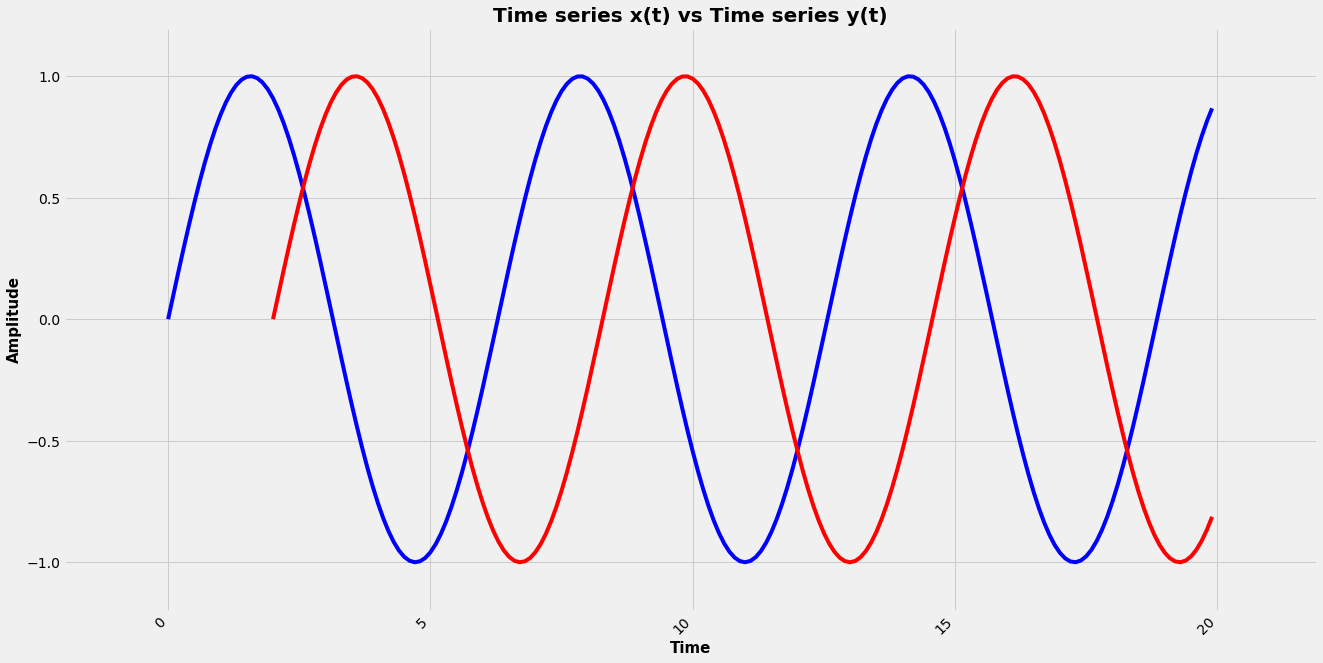

In [4]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot( time_serie, label="x(t)", color='blue')
ax.plot( time_serie_lagged, label="y(t)", color='red')
    
ax.set_title('Time series x(t) vs Time series y(t)', weight='bold', fontsize = 20)
ax.set_ylabel('Amplitude', weight='bold', fontsize = 15)
ax.set_xlabel('Time', weight='bold', fontsize=15)


    # Ajusta o formato das datas no eixo x

    
plt.xticks(rotation=45, ha='right')  # Ajusta a inclinação das datas
    
plt.margins(0.1)
    
    

plt.show()
plt.close()

### test  time-lagged cross-correlations without noise

In the following code, the cross-correlation between two time series, d1 and d2, is calculated for different lags within an interval of ±5 seconds, assuming a sampling rate of 30 frames per second. 

This code defines a function, crosscorr, to calculate the cross-correlation between two time series, datax and datay. 

- The 'lag' is a tool that indicates the delay between two time series. When set to zero, there is no initial delay between the two time series.

- The 'wrap' argument is a boolean indicating whether to wrap the time series if there is a delay. If 'wrap' is set to True, the last lag observations will be placed at the beginning of the shifted series. If 'wrap' is set to False, the shifted observations will be filled with NaNs.

- the code calculated the cross correlation betwenn datax and datay whit delay. if wrap is true, it adjusts the time series according to the delay.

- The crosscorr function returns the cross correlation value between datax and datay after a defined lag.

- The time series, d1 and d2, are extractions from the time_serie and time_serie_lagged DataFrame. Afterwards, they are passed to the crosscorr function utilizing different lag values ranging from -150 to 150. Each cross-correlation value is saved in a list called rs.

- The function returns the value of offset which indicates the delay or advance between d1 and d2 resulting in high cross-correlation. The graph below presents the cross-correlation function and identifies the point of maximum synchronization between the series.




In [5]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

f'Offset=  20.0 frames
 S1 leads <> S2 leads


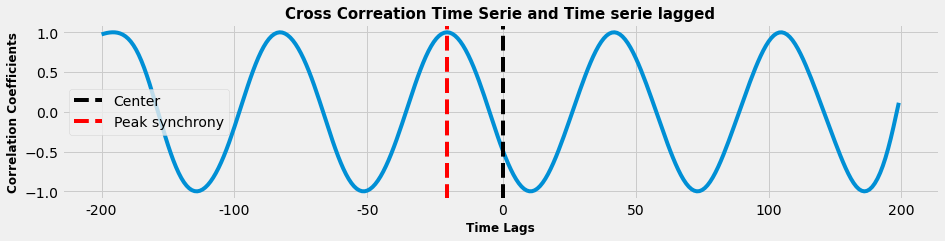

In [6]:

d1 = time_serie['amplitude'].dropna()
d2 = time_serie_lagged['amplitude'].dropna()


d1_centred=d1-d1.mean()
d2_centred=d2-d2.mean()
seconds = 5
fps = 30
rs = [crosscorr(d1_centred,d2_centred, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')


ax.set_title('Cross Correation Time Serie and Time serie lagged', weight='bold', fontsize = 15)
ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)

ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-200, -100, -50, 0, 50, 100, 200]);
plt.legend()

print("f'Offset= ", offset, "frames\n S1 leads <> S2 leads")

Positive Correlation: Two variables have a positive correlation when they tend to increase or decrease together. This implies that when one variable increases, the other also tends to increase (and vice versa). Positive correlation is indicated by a correlation coefficient close to +1.

- A score of 20 demonstrates a strong maximum positive correlation when d2 is lagging d1 by 20 frames. The time series patterns are well-coordinated specifically when d1 is trailing d2 by this interval. 

- However, if the score were -20, d2 would be leading d1.

# add noise at time serie 

##### Parameters of np.random.normal:
loc: float or array_like of floats: 
    Mean (“centre”) of the distribution.

scale float or array_like of floats: 
     Standard deviation (spread or “width”) of the distribution. Must be non-negative.

size int or tuple of ints, optional


In [7]:
# Get x values of the sine wave

time = np.arange(0, 20, 0.1);

# Amplitude of the sine wave is sine of a variable like time

amplitude = np.sin(time)

time_serie = pd.DataFrame({
                  'amplitude': amplitude},
                  index=time)

time_serie.index.name='timestamp'
time_serie


,amplitude
timestamp,
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
19.5,0.605540
19.6,0.681964
19.7,0.751573


In [8]:
noise = np.random.normal(loc=0, scale=0.0001, size=time_serie.shape)

noisy_time_serie= time_serie + noise

noisy_time_serie_lagged=noisy_time_serie.shift(20)+ np.random.normal(loc=0, scale=0.01, size=time_serie.shape)


### Signal to noise ratio

The signal-to-noise ratio (SNR) is a metric that compares the strength of a target signal against the background noise in a time series. Technical term abbreviations will be explained when first used, while keeping the language objective, clear, and value-neutral. This signifies the quality of the signal in regard to the noise presented in the data.

based on the analysis in the article "Estimating and improving the signal-to-noise ratio of time series by symbolic dynamics" by computing the SNR according to SNR = Q = \sqrt\frac{P_s}{P_n} we obtain Q=A/(\sigma \sqrt(2))

A is the amplitude of the harmonic ascillation and the phase offset has been set to zero.

This quantity assumes values between zero (A=0: there is no signal at all) and plus infinity (sigma=0: there is no additive noise)

In [9]:
import math

noise_std=noisy_time_serie['amplitude'].std()

# Calculate the Signal-to-Noise Ratio (SNR)
snr=1/(noise_std*math.sqrt(2))
snr

1.0098063194904323

In [10]:

noisy_time_serie.rename(columns={"amplitude": "x(t)"})
noisy_time_serie_lagged.rename(columns={"amplitude": "y(t)"})

,y(t)
timestamp,
0.0,NaN
0.1,NaN
0.2,NaN
0.3,NaN
0.4,NaN
...,...
19.5,-0.964893
19.6,-0.942621
19.7,-0.905535


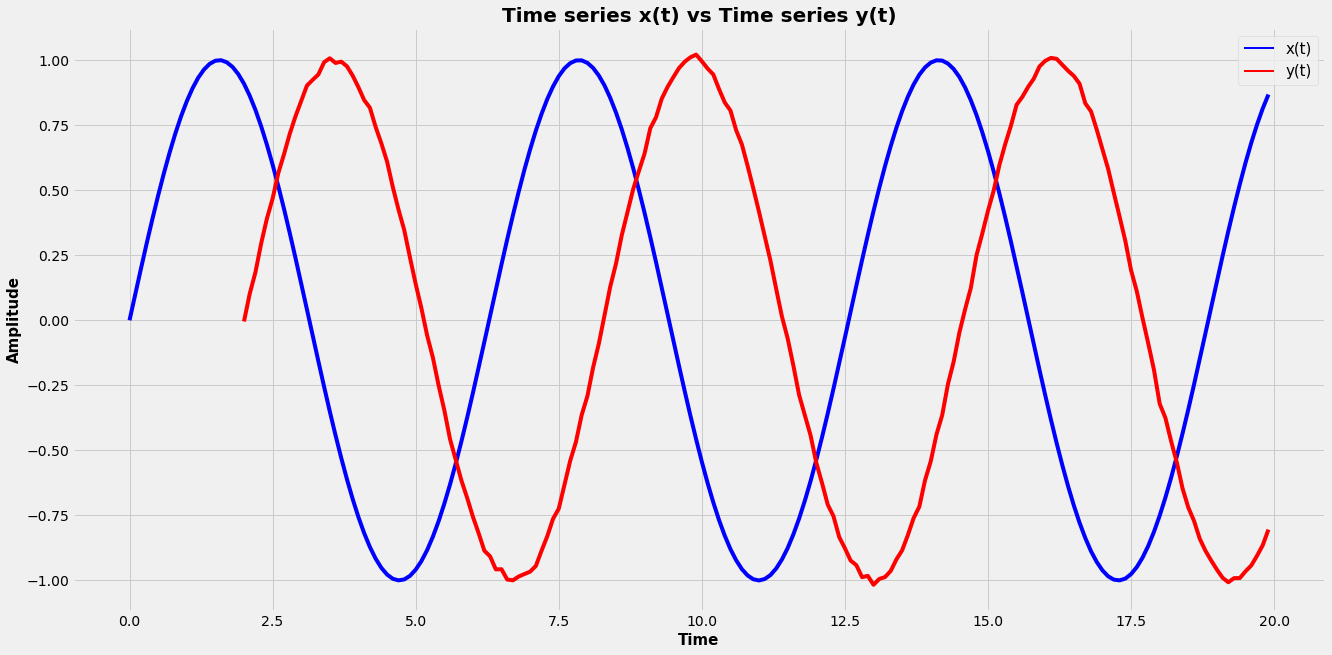

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot( noisy_time_serie, label="x(t)", color='blue')
ax.plot( noisy_time_serie_lagged, label="y(t)", color='red')
    
ax.set_title('Time series x(t) vs Time series y(t)', weight='bold', fontsize = 20)
ax.set_ylabel('Amplitude', weight='bold', fontsize = 15)
ax.set_xlabel('Time', weight='bold', fontsize=15)
# Cria uma legenda personalizada para x(t) e y(t)
custom_legend = [
    plt.Line2D([0], [0], color='blue', lw=2),
    plt.Line2D([0], [0], color='red', lw=2)
]


# Adiciona a legenda personalizada ao gráfico
plt.legend(custom_legend, ['x(t)', 'y(t)'], fontsize=15)

plt.show()

In [12]:
noisy_time_serie_lagged.shape

(200, 1)

### test  time-lagged cross-correlations with noise

f'Offset=  20.0 frames
 S1 leads <> S2 leads


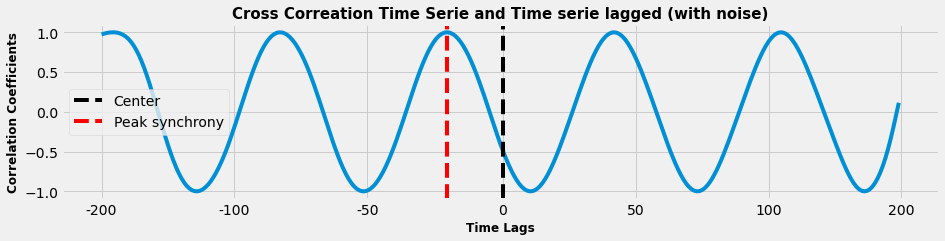

In [13]:


d1_centred=d1-d1.mean()
d2_centred=d2-d2.mean()
seconds = 5
fps = 30
rs = [crosscorr(d1_centred,d2_centred, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')


ax.set_title('Cross Correation Time Serie and Time serie lagged (with noise)', weight='bold', fontsize = 15)
ax.set_ylabel('Correlation Coefficients', weight='bold', fontsize = 12)
ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)

ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-200, -100, -50, 0, 50, 100, 200]);
plt.legend()
print("f'Offset= ", offset, "frames\n S1 leads <> S2 leads")

#### notes:
The result of this test is identical of the result of test without noise, thus the method produces the expected outcomes with noise.

### test 1000 times  variance 

In [14]:
# Get x values of the sine wave

time = np.arange(0, 20, 0.1);

# Amplitude of the sine wave is sine of a variable like time

amplitude = np.sin(time)

time_serie = pd.DataFrame({
                  'amplitude': amplitude},
                  index=time)

time_serie.index.name='timestamp'
time_serie

,amplitude
timestamp,
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
19.5,0.605540
19.6,0.681964
19.7,0.751573


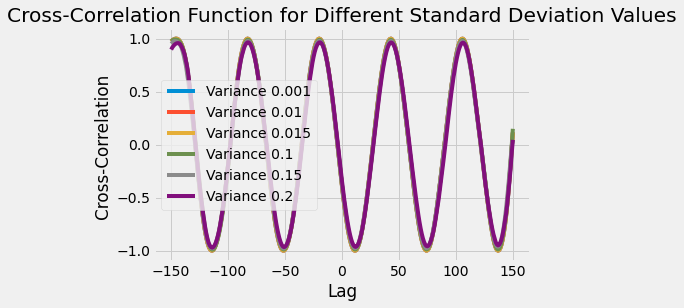

In [15]:


variance=[0.001, 0.01, 0.015, 0.1, 0.15, 0.2]
data=pd.DataFrame() 
snr=[]
lagged=[]
lags_for_variances = []
noisy_time_serie= time_serie + np.random.normal(loc=0, scale=0.0001, size=time_serie.shape)

for k in variance:
    
    

    noisy_time_serie_lagged_var=noisy_time_serie.shift(20)+ np.random.normal(loc=0, scale=k, size=time_serie.shape)
    
    noise_std=noisy_time_serie_lagged_var['amplitude'].std()

    # Calculate the Signal-to-Noise Ratio (SNR)
    s=1/(noise_std*math.sqrt(2))
    snr.append(s)
    
    for i in range(1,10):
        d1 = noisy_time_serie['amplitude'].dropna()
        d2 = noisy_time_serie_lagged_var['amplitude'].dropna()
        d1_centred=d1-d1.mean()
        d2_centred=d2-d2.mean()

        seconds = 5
        fps = 30
        rs_noise = [crosscorr(d1_centred,d2_centred, lag) for lag in range(-int(seconds*fps),int(seconds*fps+1))]
        offset = np.floor(len(rs_noise)/2)-np.argmax(rs)
        lagged.append(offset)
        
    
    data[k] = lagged
    lagged=[]
    
    
    # Encontrar o lag correspondente ao máximo na função de correlação cruzada
    lag_for_k = np.arange(-150, 151)[np.argmax(rs_noise)]
    
    # Armazenar o lag correspondente ao valor de variância k
    lags_for_variances.append(lag_for_k)

    # Fazer o plot da função de correlação cruzada para o valor de variância k
    plt.plot(np.arange(-150, 151), rs_noise, label=f'Variance {k}')


# Adicionar legendas, rótulos e mostrar o gráfico
plt.xlabel('Lag')
plt.ylabel('Cross-Correlation ')
plt.title('Cross-Correlation Function for Different Standard Deviation Values')
plt.legend()
plt.show()


In [16]:

# Mostrar os lags correspondentes a cada valor de variância
for i, lag in enumerate(lags_for_variances):
    print(f'Lag corresponding to Standard deviation {variance[i]}: {lag}')


Lag corresponding to Standard deviation 0.001: -20
Lag corresponding to Standard deviation 0.01: -20
Lag corresponding to Standard deviation 0.015: -20
Lag corresponding to Standard deviation 0.1: -147
Lag corresponding to Standard deviation 0.15: -20
Lag corresponding to Standard deviation 0.2: -83


In [17]:
data

,0.001,0.010,0.015,0.100,0.150,0.200
0,20.0,20.0,20.0,20.0,20.0,20.0
1,20.0,20.0,20.0,20.0,20.0,20.0
2,20.0,20.0,20.0,20.0,20.0,20.0
3,20.0,20.0,20.0,20.0,20.0,20.0
4,20.0,20.0,20.0,20.0,20.0,20.0
5,20.0,20.0,20.0,20.0,20.0,20.0
6,20.0,20.0,20.0,20.0,20.0,20.0
7,20.0,20.0,20.0,20.0,20.0,20.0
8,20.0,20.0,20.0,20.0,20.0,20.0


In [18]:
snr

[0.9857820901039112,
 0.9859455795798487,
 0.9863278795578247,
 0.9626749713039001,
 0.9746052680091472,
 0.9911865800138883]

#### Notes: 
The outcomes remain unchanged for any standard deviation, demonstrating that the method generates expected results even when subjected to noise.